In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("data_ML.csv", encoding="latin1")


/tmp/ipython-input-2369769321.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data_ML.csv", encoding="latin1")


In [ ]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [ ]:
x = df['no2'].dropna().values


In [ ]:
print(df.columns)

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')


In [ ]:
r = 102303564

In [ ]:
ar = 0.05 * (r % 7)
br = 0.3 * ((r % 5) + 1)

print("ar =", ar)
print("br =", br)

ar = 0.30000000000000004
br = 1.5


In [ ]:
z = x + ar * np.sin(br * x)

In [ ]:
mu = np.mean(z)

In [ ]:
sigma2 = np.var(z)

In [ ]:
lam = 1 / (2 * sigma2)
c = 1 / np.sqrt(2 * np.pi * sigma2)

In [ ]:
print("\n=== Learned PDF Parameters ===")
print("mu =", mu)
print("lambda =", lam)
print("c =", c)


=== Learned PDF Parameters ===
mu = 25.819751672076507
lambda = 0.001461926988966829
c = 0.021571875520386332


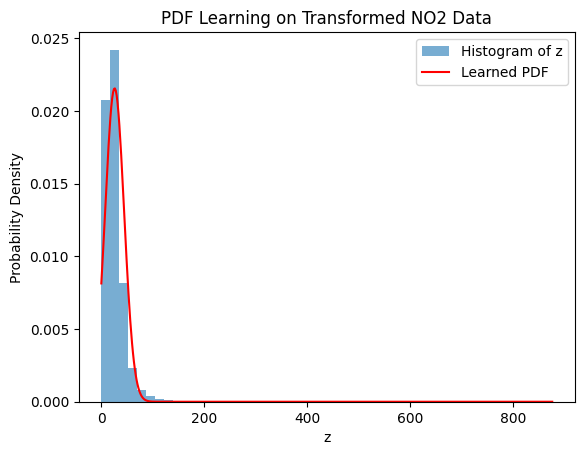

In [ ]:
plt.hist(z, bins=50, density=True, alpha=0.6, label="Histogram of z")

z_range = np.linspace(min(z), max(z), 500)
pdf = c * np.exp(-lam * (z_range - mu)**2)

plt.plot(z_range, pdf, 'r', label="Learned PDF")
plt.xlabel("z")
plt.ylabel("Probability Density")
plt.title("PDF Learning on Transformed NO2 Data")
plt.legend()
plt.show()